## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#we use shape to see the number of rows in dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#we use nunique() to see the number of unique users in the dataser
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# I stored the proportion calculated using the query of converted by the number of user multuplied by 100 and printed the result
perc= int(df.query('converted == "1"').user_id.nunique() / df.user_id.nunique() *100)
print('percentage of converted is {}%'.format(perc))

percentage of converted is 12%


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#I created queries to have the inconsisties in the dataset and then added the counts to have the total 
df_new_page = df.query('landing_page == "new_page" and group !="treatment"')  
df_old_page = df.query('landing_page != "new_page" and group == "treatment"')

df_new_page.count() + df_old_page.count()



user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
#In order to see any missing value I used the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#we drop the two set of data that are inconsistent
df1 = df.drop(df_new_page.index)
df2 = df1.drop(df_old_page.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#We use nunique to check 
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#we used duplicated and sum to see the number of duplicated
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [12]:
#We print the row which is duplicated to have the information
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#We drop the duplicated row
df2.drop_duplicates(subset="user_id", inplace= True)


In [14]:
#We check the number of user id if the operation was done and if we kept one of the duplicated
df2.user_id.count()

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#we used mean to have the proportion 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#We use query to select the control group and calculated the mean of converted among them
(df2.query('group == "control"')['converted']).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#We do the same for the treatment group
(df2.query('group == "treatment"')['converted']).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#we create dummies to calculate the mean of new page
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.new_page.mean()

0.50006194422266881

In [19]:
#We calculate the difference in mean between the two group
obs_diff = (df2.query('group == "treatment"')['converted']).mean() - (df2.query('group == "control"')['converted']).mean()
obs_diff

-0.0015782389853555567

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

** The probaility for an individual in the treatment group to convert is less than for the control group that suggests the new pge leads to less conversions however, the difference is only 0,16% which can not be considered as significative enough to draw conclusion. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### The null alternative is that the old page is the same as or better than the new 
$$H_0: p_{old} \geq p_{new} $$
$$ H_0: p_{new} - p_{old} \leq 0 $$

#### The alternative hypothese is that the new page is better 
$$H_1: p_{old} < p_{new} $$
$$H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
print( 'as the Pnew and Pold are equal \nit means in other words we should have the same probability \nregardless the landing page which is {}'.format(0.1196))

as the Pnew and Pold are equal 
it means in other words we should have the same probability 
regardless the landing page which is 0.1196


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
print( 'as the Pnew and Pold are equal \nit means in other words we should have the same probability \nregardless the landing page which is {}'.format(0.1196))

as the Pnew and Pold are equal 
it means in other words we should have the same probability 
regardless the landing page which is 0.1196


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
#we make a query to select the treatment group to count number of user
N_new = df2.query('group == "treatment"').user_id.count()
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
#We do the same for the control group
N_old = df2.query('group == "control"').user_id.count()
N_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#We simulate the same number of user with the same probability using a random choice array for new_page converted
new_page_converted = np.random.choice([0, 1], size=145310, p=[0.8804, 0.1196])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
#We do the same for old page converted
old_page_converted=np.random.choice([0, 1], size=145274, p=[0.8804, 0.1196])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#We calculate the difference in mean between the new page and the old page
new_page_converted.mean() - old_page_converted.mean()

0.00033506228137089589

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
#We use loop to create 10000 difference in mean using the same technique above
p_diffs = []
for _ in range(10000):
    new_page_conv = np.random.choice([0, 1], size=145311, p=[0.8804, 0.1196])
    old_page_conv = np.random.choice([0, 1], size=145274, p=[0.8804, 0.1196])
    
    p_diffs.append (new_page_conv.mean() - old_page_conv.mean())

    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

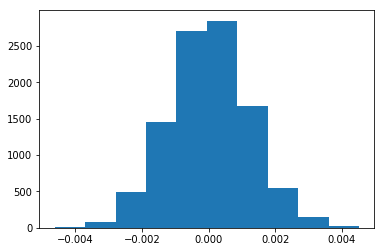

In [28]:
#we use plot hist and it seems to be a normal ditribution
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9073

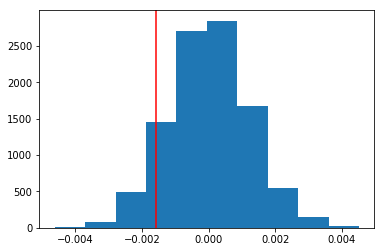

In [29]:
#We use plot to make appear the difference in ab_data to see the proportion that are greater in d_diffs and we caluculate it
plt.hist(p_diffs)
plt.axvline(obs_diff, c='red');
(p_diffs > obs_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***we calculated the p-value as it is more important than 0,05 it means that we cn not reject the null hypothesis, that there is no difference between the new and the old pages***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
# Import stats model, we'll later use it. This part was a real defy for me and I had to make search to find a solution in the forum Knwoledge in Udacity website
import statsmodels.api as sm 
# control 
convert_old = sum((df2.group == 'control') & (df2.converted == 1)) 
# treatment
convert_new = sum((df2.group == 'treatment') & (df2.converted == 1)) 
n_old = sum(df2.group == 'control') 
n_new = sum(df2.group == 'treatment') 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
#This part was a real defy for me and I had to make search to find a solution
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z score is between -1.96 and +1.96 and the p-value is more thn 0.005 which means that we can not reject the null hypothesis as we found in part j and k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As the row is about categorical response for which we use logistic regression according to Lesson 16: it used to predict only two options whether an individual will click or not**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#We create intercept and dummies for columns which are categorical 'landing_page' and 'group' we remove, two 
df2['intercept']=1
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(['control'], axis=1)
df2 = df2.drop(['old_page'], axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
#We use statsmodels to initiate regression model on the two columns
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:               8.077e-06
Time:                        09:47:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ab_page is associated with p-value = 0.190 which is higher than 0.05 which means that the null hypothesis can not be rejected however it is far from the value found in Part II 0.90.**
**Indeed he result differs from the Part II because the Part II is one tail test and the Part III is a two tail test: in the first the null hypothesis is that 
$$P_{new} - P_{old} \leq 0$$ were in the Part III it is equal to 0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**As it was indicated in the course, there are biases that can influence the result such as the aversion for the new items or ideas, the age of the participants which can influence the level of acceptance of new items**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
#We create a new DataFrame with the information on countries provided by the dataset we check if we have same number of users
df3 = pd.read_csv('countries.csv')
(df3.user_id.count() == df2.user_id.count())


True

In [35]:
#We join the two dataset on user_id
df_join = pd.merge(df2, df3, on='user_id')
df_join.head()

,user_id,timestamp,group,landing_page,converted,new_page,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,US


In [36]:
#We check how many countries are in the dataset
df_join.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [37]:
#We create dummies for the three countries
df_join[['CA','UK', 'US']] = pd.get_dummies(df_join['country'])

df_join.head()

,user_id,timestamp,group,landing_page,converted,new_page,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,US,0,0,1


In [38]:
#We initiate a regression model to see if there is impact of countries on conversion
log_mod = sm.Logit(df_join['converted'], df_join[['intercept','CA','UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:               1.521e-05
Time:                        09:43:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Based on the model, there are differences between countries in terms of conversion but there are not significative since the P-value is more important than 0.05**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
#we initiate a new regression model to draw conclusion on impact of countries and new page on conversion
log_mod = sm.Logit(df_join['converted'], df_join[['intercept','ab_page', 'CA','UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:               2.323e-05
Time:                        09:43:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**The model shows that there are significant differences between countries when we take into account the page and the conversion however, the p-value is more than 0.05 which means that we can not reject the null hypothesis regardless the country**

**The anlysis shows that we can not reject the null hypothesis even when we take into account difference in countries and that that there are no positive effect on conversion with the new page**

**As a conclusion,the new page is not better than the old page**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0